In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files

In [3]:
movies = ("rotten_tomatoes_movies.csv")
tmdb = ("tmdb_movies_data.csv")
movie_data = pd.read_csv(movies)
tmdb_data = pd.read_csv(tmdb)
movie_data.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49,144,Spilled,53.0,254287.0,38,71,73
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,68,22,Spilled,53.0,14670.0,2,15,7
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,Certified Fresh,100,51,Upright,97.0,105000.0,6,51,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,Fresh,89,27,Upright,74.0,68860.0,5,24,3


In [4]:
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,Movie Title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [5]:
tmdb_data["Title Release"] = ""
tmdb_data["runtime"] = tmdb_data["runtime"].astype(str)
tmdb_data["Title Release"] = tmdb_data["Movie Title"] + " " + tmdb_data["runtime"] +".0"
tmdb_data.head()


,id,imdb_id,popularity,budget,revenue,Movie Title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Title Release
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Jurassic World 124.0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Mad Max: Fury Road 120.0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,Insurgent 119.0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,Star Wars: The Force Awakens 136.0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,Furious 7 137.0


In [6]:

movie_data = movie_data.rename(columns={"rotten_tomatoes_link": "Link",
                                       "movie_info": "Movie Info", "studio_name": "Studio", "tomatometer_status": "Tomatometer Status",
                                       "tomatometer_rating": "Tomatometer Rating", "runtime_in_minutes": "Runtime", "in_theaters_date": "Theater Release", "audience_status": "Audience Status",
                                       "audience_rating": "Audience Rating", "audience_count": "Audience Count", "audience_top_critics_count": "Audience Top Critics Count",
                                       "audience_fresh_critics_count": " Audience Fresh Critics Count", "audience_rotten_critics_count": "Audience Rotten Critics Count"})
movie_data.head(3)

,Link,movie_title,Movie Info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,Studio,Tomatometer Status,Tomatometer Rating,tomatometer_count,Audience Status,Audience Rating,Audience Count,Audience Top Critics Count,Audience Fresh Critics Count,Audience Rotten Critics Count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49,144,Spilled,53.0,254287.0,38,71,73
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,68,22,Spilled,53.0,14670.0,2,15,7


In [7]:
movie_data["Title Release"] = ""
movie_data["Runtime"] = movie_data["Runtime"].astype(str)
movie_data["Title Release"] = movie_data["movie_title"] + " " + movie_data["Runtime"]
movie_data.head()

,Link,movie_title,Movie Info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,Tomatometer Status,Tomatometer Rating,tomatometer_count,Audience Status,Audience Rating,Audience Count,Audience Top Critics Count,Audience Fresh Critics Count,Audience Rotten Critics Count,Title Release
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,Rotten,49,144,Spilled,53.0,254287.0,38,71,73,Percy Jackson & the Olympians: The Lightning T...
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19,Please Give 90.0
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Fresh,68,22,Spilled,53.0,14670.0,2,15,7,10 118.0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Certified Fresh,100,51,Upright,97.0,105000.0,6,51,0,12 Angry Men (Twelve Angry Men) 95.0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Fresh,89,27,Upright,74.0,68860.0,5,24,3,"20,000 Leagues Under The Sea 127.0"


In [8]:
combined_movie = pd.merge(movie_data, tmdb_data, how ='left', on='Title Release')

combined_movie


,Link,movie_title,Movie Info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast_x,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,"In New York City, a husband and wife butt head...",90,Comedy|Drama,Sony Pictures Classics|Likely Story|Feelin' Gu...,1/22/2010,24.0,5.6,2010.0,3000000.000,0.0
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16639,/m/zoot_suit,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,https://resizing.flixster.com/aN813Th-ct2RYBoO...,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16640,/m/zootopia,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,https://resizing.flixster.com/fBep1-c91oIjvXBM...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16641,/m/zorba_the_greek,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,https://resizing.flixster.com/dpBkx_TAP6Z0P0Pl...,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",...,An uptight English writer traveling to Crete o...,142,Adventure|Drama,Twentieth Century Fox Film Corporation,12/14/1964,20.0,6.6,1964.0,5504699.382,0.0
16642,/m/zulu,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,https://resizing.flixster.com/lwPbtPs4ikIa2JNy...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
combined_movie = combined_movie.rename(columns={"budget": "Budget", "revenue": "Revenue", "genre": "Genre"})
combined_movie = combined_movie.dropna(subset=['Budget', "Revenue"])
combined_movie.head()

,Link,movie_title,Movie Info,critics_consensus,poster_image_url,rating,Genre,directors,writers,cast_x,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,"In New York City, a husband and wife butt head...",90,Comedy|Drama,Sony Pictures Classics|Likely Story|Feelin' Gu...,1/22/2010,24.0,5.6,2010.0,3.000000e+06,0.00
22,/m/10003925-dead_end,Dead End,A family making their annual Christmas pilgrim...,NaN,https://resizing.flixster.com/xe8wB-pFYcOByS1U...,R,"Comedy, Horror, Mystery & Suspense","Jean-Baptiste Andrea, Fabrice Canepa, Jean-Bap...","Jean-Baptiste Andrea, Fabrice Canepa","Ray Wise, Lin Shaye, Mick Cain, Alexandra Hold...",...,Christmas Eve. On his way to his in-laws with ...,85,Mystery|Horror|Thriller,Sagittaire Films|Captain Movies,1/30/2003,49.0,6.5,2003.0,0.000000e+00,0.00
30,/m/10004504-ultraviolet,Ultraviolet,In the late 21st a disease called Hemophagia h...,An incomprehensible and forgettable sci-fi thr...,https://resizing.flixster.com/i1vI9FQioTCmZCH9...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",...,A beautiful hemophage infected with a virus th...,88,Science Fiction|Action|Thriller,Screen Gems|Ultravi Productions,3/3/2006,256.0,5.0,2006.0,3.245007e+07,33607688.98
42,/m/10005499-oliver_twist,Oliver Twist,Director Roman Polanski gives one of Charles D...,Polanski's version of Dickens' classic won't h...,https://resizing.flixster.com/dTa7ktj24R4SiE83...,PG-13,"Drama, Kids & Family",Roman Polanski,Ronald Harwood,"Ben Kingsley, Barney Clark, Leanne Rowe, Mark ...",...,Oliver Twist the modern filmed version of Char...,130,Crime|Drama|Family,R.P. Productions|ETIC Films|Runteam III Ltd.,9/23/2005,143.0,6.6,2005.0,5.582816e+07,47000286.85
55,/m/10006343-dirty,Dirty,"In a city ravaged by violent crime, the police...",Dirty is an unoriginal L.A. cop drama that wea...,https://resizing.flixster.com/ion4o_HWv9groxeI...,R,Drama,Chris Fisher,"Chris Fisher, Gil Reavill, Eric Saks","Cuba Gooding Jr., Wyclef Jean, Keith David, Ai...",...,Two gangbangers-turned-cops try and cover up a...,97,Crime|Drama|Thriller,Deviant Films|Silver Nitrate Pictures,11/10/2005,17.0,5.7,2005.0,3.349690e+06,0.00


In [10]:
refined_movie_data = combined_movie[["movie_title", "Studio","Theater Release","Budget", "Revenue", "Tomatometer Status", "Tomatometer Rating", "Audience Status", "Audience Rating", "Audience Count"]]
refined_movie_data

,movie_title,Studio,Theater Release,Budget,Revenue,Tomatometer Status,Tomatometer Rating,Audience Status,Audience Rating,Audience Count
1,Please Give,Sony Pictures Classics,2010-04-30,3000000.0,0.0,Certified Fresh,86,Upright,64.0,11567.0
22,Dead End,LionsGate Entertainment,2003-09-26,0.0,0.0,Fresh,75,Upright,60.0,10351.0
30,Ultraviolet,Sony Pictures,2006-03-03,30000000.0,31070211.0,Rotten,8,Spilled,30.0,279966.0
42,Oliver Twist,Sony Pictures,2005-09-30,50000000.0,42093706.0,Fresh,60,Upright,63.0,23278.0
55,Dirty,SNP Inc.,2006-02-24,3000000.0,0.0,Rotten,21,Spilled,42.0,7321.0
...,...,...,...,...,...,...,...,...,...,...
16627,Zipper,Alchemy Films,2015-08-28,0.0,0.0,Rotten,20,Spilled,27.0,464.0
16628,Zodiac,Paramount Pictures,2007-03-02,65000000.0,84785914.0,Certified Fresh,89,Upright,77.0,493811.0
16629,Zombeavers,Freestyle Releasing,2015-03-20,0.0,14947.0,Fresh,69,Spilled,31.0,3629.0
16632,Zombieland,Sony/Columbia Pictures,2009-10-02,23600000.0,102391382.0,Certified Fresh,90,Upright,86.0,642759.0


In [11]:
combined_movie["Genre_One"] = ""
combined_movie["Year"] = ""
combined_movie["Genre_One"] = combined_movie["genres"].apply(lambda x:x.split("|")[0])
combined_movie["Year"] = combined_movie["release_date"].apply(lambda x:x.split("/")[2])
combined_movie


,Link,movie_title,Movie Info,critics_consensus,poster_image_url,rating,Genre,directors,writers,cast_x,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Genre_One,Year
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Comedy|Drama,Sony Pictures Classics|Likely Story|Feelin' Gu...,1/22/2010,24.0,5.6,2010.0,3.000000e+06,0.000000e+00,Comedy,2010
22,/m/10003925-dead_end,Dead End,A family making their annual Christmas pilgrim...,NaN,https://resizing.flixster.com/xe8wB-pFYcOByS1U...,R,"Comedy, Horror, Mystery & Suspense","Jean-Baptiste Andrea, Fabrice Canepa, Jean-Bap...","Jean-Baptiste Andrea, Fabrice Canepa","Ray Wise, Lin Shaye, Mick Cain, Alexandra Hold...",...,Mystery|Horror|Thriller,Sagittaire Films|Captain Movies,1/30/2003,49.0,6.5,2003.0,0.000000e+00,0.000000e+00,Mystery,2003
30,/m/10004504-ultraviolet,Ultraviolet,In the late 21st a disease called Hemophagia h...,An incomprehensible and forgettable sci-fi thr...,https://resizing.flixster.com/i1vI9FQioTCmZCH9...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",...,Science Fiction|Action|Thriller,Screen Gems|Ultravi Productions,3/3/2006,256.0,5.0,2006.0,3.245007e+07,3.360769e+07,Science Fiction,2006
42,/m/10005499-oliver_twist,Oliver Twist,Director Roman Polanski gives one of Charles D...,Polanski's version of Dickens' classic won't h...,https://resizing.flixster.com/dTa7ktj24R4SiE83...,PG-13,"Drama, Kids & Family",Roman Polanski,Ronald Harwood,"Ben Kingsley, Barney Clark, Leanne Rowe, Mark ...",...,Crime|Drama|Family,R.P. Productions|ETIC Films|Runteam III Ltd.,9/23/2005,143.0,6.6,2005.0,5.582816e+07,4.700029e+07,Crime,2005
55,/m/10006343-dirty,Dirty,"In a city ravaged by violent crime, the police...",Dirty is an unoriginal L.A. cop drama that wea...,https://resizing.flixster.com/ion4o_HWv9groxeI...,R,Drama,Chris Fisher,"Chris Fisher, Gil Reavill, Eric Saks","Cuba Gooding Jr., Wyclef Jean, Keith David, Ai...",...,Crime|Drama|Thriller,Deviant Films|Silver Nitrate Pictures,11/10/2005,17.0,5.7,2005.0,3.349690e+06,0.000000e+00,Crime,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16627,/m/zipper,Zipper,A family man who has it all until he risks los...,NaN,https://resizing.flixster.com/mnlQCmsgqwBwTSZN...,R,"Drama, Mystery & Suspense",Mora Stephens,"Mora Stephens, Joel Viertel","Patrick Wilson, Lena Headey, Alexandra Brecken...",...,Thriller|Drama,Protozoa Pictures|Cargo Entertainment|33 Pictures,8/28/2015,30.0,5.5,2015.0,0.000000e+00,0.000000e+00,Thriller,2015
16628,/m/zodiac,Zodiac,Based on the true story of the notorious seria...,"A quiet, dialogue-driven thriller that deliver...",https://resizing.flixster.com/XSJqfmwtzuOUps1g...,R,Mystery & Suspense,David Fincher,James Vanderbilt,"Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",...,Crime|Drama|Mystery|Thriller,Paramount Pictures|Warner Bros.|Phoenix Pictures,3/2/2007,1042.0,7.1,2007.0,6.835846e+07,8.916668e+07,Crime,2007
16629,/m/zombeavers,Zombeavers,When a trio of college girls arrive at a remot...,"Zombeavers obviously isn't high art, but it de...",https://resizing.flixster.com/qKqIbI_-7uTq4Mlp...,R,"Action & Adventure, Comedy, Horror",Jordan Rubin,"Jon Kaplan, Al Kaplan","Rachel Melvin, Cortney Palm, Lexi Atkins, Hutc...",...,Horror|Action|Comedy,BenderSpink|Armory Films,10/20/2014,124.0,4.8,2014.0,0.000000e+00,1.376755e+04,Horror,2014
16632,/m/zombieland,Zombieland,A cowardly shut-in named Columbus (Jesse Eisen...,"Wickedly funny and featuring plenty of gore, Z...",https://resizing.flixster.com/c2f4o7XaS25XGuH0...,R,"Comedy, Horror",Ruben Fleischer,"Rhett Reese, Paul Wernick","Woody Harrelson, Jesse Eisenberg, Emma S

In [12]:
# refined_movie_data = refined_movie_data.drop_duplicates(subset:)
# refined_movie_data

In [13]:
Disney = refined_movie_data[(refined_movie_data["Studio"]== "Disney")]

Disney

,movie_title,Studio,Theater Release,Budget,Revenue,Tomatometer Status,Tomatometer Rating,Audience Status,Audience Rating,Audience Count
440,Freaky Friday,Disney,1976-12-17,0.0,0.0,Fresh,70,Spilled,57.0,65734.0
953,Cool Runnings,Disney,1993-10-01,14000000.0,154864401.0,Fresh,77,Upright,81.0,532908.0
957,The Three Musketeers,Disney,1993-11-12,30000000.0,53898845.0,Rotten,31,Upright,62.0,169731.0
958,The Three Musketeers,Disney,1993-11-12,0.0,0.0,Rotten,31,Upright,62.0,169731.0
1069,The Rock,Disney,1996-06-07,75000000.0,335062621.0,Fresh,66,Upright,85.0,305085.0
2272,The Adventures of Huck Finn,Disney,1993-04-02,0.0,0.0,Fresh,73,Spilled,50.0,20393.0
3143,Beaches,Disney,1988-12-21,0.0,57041866.0,Rotten,39,Upright,88.0,71187.0
4587,Con Air,Disney,1997-06-06,75000000.0,224012234.0,Rotten,55,Upright,75.0,417177.0
4877,Dangerous Minds,Disney,1995-08-11,0.0,180000000.0,Rotten,28,Upright,64.0,102991.0
6216,Flubber,Disney,1997-11-26,80000000.0,177977226.0,Rotten,24,Spilled,33.0,623640.0


In [14]:
comedy_df = combined_movie.loc[combined_movie["Genre_One"] == "Comedy", :]
comedy_df

grouped_years_comedy = comedy_df.groupby(["Year"]).mean()
#grouped_years_comedy
grouped_years_comedy_sum = comedy_df.groupby(["Year"]).sum()
grouped_years_comedy_sum
grouped_years_comedy["Total Revenue"] = grouped_years_comedy_sum["Revenue"]
grouped_years_comedy

cleaned_years_group_comedy = grouped_years_comedy.drop(["1972", "1962", "1963", "1965", "1968", "1969", "1971"])
cleaned_years_group_comedy

#comedy_df = combined_movie.groupby[("Genre_One")"Comedy"]
#comedy_df.head()

,Tomatometer Rating,tomatometer_count,Audience Rating,Audience Count,Audience Top Critics Count,Audience Fresh Critics Count,Audience Rotten Critics Count,id,popularity,Budget,Revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj,Total Revenue
Year,,,,,,,,,,,,,,,,,
1960,85.333333,29.000000,72.333333,3.255833e+04,5.333333,26.333333,2.666667,13508.000000,0.428904,1.010000e+06,1.166667e+07,90.000000,6.966667,1960.0,7.446697e+06,8.601795e+07,3.500000e+07
1961,63.000000,8.000000,72.000000,2.298000e+03,0.000000,5.000000,3.000000,248.000000,0.290285,2.900000e+06,5.000000e+06,10.000000,6.100000,1961.0,2.115510e+07,3.647431e+07,5.000000e+06
1964,78.400000,22.000000,75.200000,1.416766e+05,3.600000,19.200000,2.800000,14618.000000,0.563255,1.200000e+06,2.045455e+07,135.000000,5.640000,1964.0,8.436321e+06,1.438009e+08,1.022727e+08
1967,80.666667,44.000000,85.000000,7.770567e+04,10.333333,36.666667,7.333333,19004.333333,0.915499,2.333333e+06,5.368792e+07,178.333333,7.266667,1967.0,1.525245e+07,3.509453e+08,1.610638e+08
1973,93.000000,59.000000,95.000000,6.163500e+04,9.000000,55.000000,4.000000,9277.000000,0.863156,5.500000e+06,1.596163e+08,304.000000,7.700000,1973.0,2.701138e+07,7.839013e+08,1.596163e+08
1974,91.000000,54.000000,91.000000,2.182540e+05,7.000000,49.000000,5.000000,11072.000000,0.577802,2.600000e+06,1.195000e+08,334.000000,7.000000,1974.0,1.149794e+07,5.284629e+08,1.195000e+08
1975,78.500000,23.250000,77.000000,9.970325e+04,3.750000,19.000000,4.250000,20898.000000,0.561508,3.000000e+05,2.822308e+07,107.500000,6.950000,1975.0,1.215546e+06,1.143549e+08,1.128923e+08
1976,85.000000,22.200000,65.400000,1.931400e+04,4.200000,19.400000,2.800000,12458.200000,0.321038,8.600000e+06,1.541130e+07,32.400000,6.280000,1976.0,3.295260e+07,5.905144e+07,7.705649e+07
1977,84.500000,52.000000,80.000000,8.441000e+04,9.000000,47.000000,5.000000,6619.000000,0.870240,3.700000e+06,3.465723e+07,261.000000,6.900000,1977.0,1.331179e+07,1.246891e+08,6.931446e+07


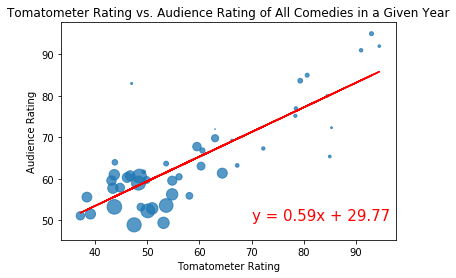

<Figure size 432x288 with 0 Axes>

In [15]:
x = cleaned_years_group_comedy["Tomatometer Rating"]
y = cleaned_years_group_comedy["Audience Rating"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regression_value = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


size = cleaned_years_group_comedy["Total Revenue"]/10000000
plt.title("Tomatometer Rating vs. Audience Rating of All Comedies in a Given Year")
plt.xlabel("Tomatometer Rating")
plt.ylabel("Audience Rating")
plt.plot(x, regression_value,"r-")
plt.annotate(line_eq, (70,50), fontsize=15, color="r")


plt.scatter(x, y, s=size, alpha=0.75)
plt.show()

plt.savefig("Comedy Ratings by Year Scatterplot")

In [55]:
combined_movie.head()

,Link,movie_title,Movie Info,critics_consensus,poster_image_url,rating,Genre,directors,writers,cast_x,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Genre_One,Year
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Comedy|Drama,Sony Pictures Classics|Likely Story|Feelin' Gu...,1/22/2010,24.0,5.6,2010.0,3.000000e+06,0.00,Comedy,2010
22,/m/10003925-dead_end,Dead End,A family making their annual Christmas pilgrim...,NaN,https://resizing.flixster.com/xe8wB-pFYcOByS1U...,R,"Comedy, Horror, Mystery & Suspense","Jean-Baptiste Andrea, Fabrice Canepa, Jean-Bap...","Jean-Baptiste Andrea, Fabrice Canepa","Ray Wise, Lin Shaye, Mick Cain, Alexandra Hold...",...,Mystery|Horror|Thriller,Sagittaire Films|Captain Movies,1/30/2003,49.0,6.5,2003.0,0.000000e+00,0.00,Mystery,2003
30,/m/10004504-ultraviolet,Ultraviolet,In the late 21st a disease called Hemophagia h...,An incomprehensible and forgettable sci-fi thr...,https://resizing.flixster.com/i1vI9FQioTCmZCH9...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",...,Science Fiction|Action|Thriller,Screen Gems|Ultravi Productions,3/3/2006,256.0,5.0,2006.0,3.245007e+07,33607688.98,Science Fiction,2006
42,/m/10005499-oliver_twist,Oliver Twist,Director Roman Polanski gives one of Charles D...,Polanski's version of Dickens' classic won't h...,https://resizing.flixster.com/dTa7ktj24R4SiE83...,PG-13,"Drama, Kids & Family",Roman Polanski,Ronald Harwood,"Ben Kingsley, Barney Clark, Leanne Rowe, Mark ...",...,Crime|Drama|Family,R.P. Productions|ETIC Films|Runteam III Ltd.,9/23/2005,143.0,6.6,2005.0,5.582816e+07,47000286.85,Crime,2005
55,/m/10006343-dirty,Dirty,"In a city ravaged by violent crime, the police...",Dirty is an unoriginal L.A. cop drama that wea...,https://resizing.flixster.com/ion4o_HWv9groxeI...,R,Drama,Chris Fisher,"Chris Fisher, Gil Reavill, Eric Saks","Cuba Gooding Jr., Wyclef Jean, Keith David, Ai...",...,Crime|Drama|Thriller,Deviant Films|Silver Nitrate Pictures,11/10/2005,17.0,5.7,2005.0,3.349690e+06,0.00,Crime,2005


In [16]:
c_movie1 = combined_movie[combined_movie["Genre_One"] !="TV Movie"]
c_movie = c_movie1[combined_movie["Genre_One"] !="Foreign"]
c_movie.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Link,movie_title,Movie Info,critics_consensus,poster_image_url,rating,Genre,directors,writers,cast_x,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Genre_One,Year
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Comedy|Drama,Sony Pictures Classics|Likely Story|Feelin' Gu...,1/22/2010,24.0,5.6,2010.0,3.000000e+06,0.00,Comedy,2010
22,/m/10003925-dead_end,Dead End,A family making their annual Christmas pilgrim...,NaN,https://resizing.flixster.com/xe8wB-pFYcOByS1U...,R,"Comedy, Horror, Mystery & Suspense","Jean-Baptiste Andrea, Fabrice Canepa, Jean-Bap...","Jean-Baptiste Andrea, Fabrice Canepa","Ray Wise, Lin Shaye, Mick Cain, Alexandra Hold...",...,Mystery|Horror|Thriller,Sagittaire Films|Captain Movies,1/30/2003,49.0,6.5,2003.0,0.000000e+00,0.00,Mystery,2003
30,/m/10004504-ultraviolet,Ultraviolet,In the late 21st a disease called Hemophagia h...,An incomprehensible and forgettable sci-fi thr...,https://resizing.flixster.com/i1vI9FQioTCmZCH9...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",...,Science Fiction|Action|Thriller,Screen Gems|Ultravi Productions,3/3/2006,256.0,5.0,2006.0,3.245007e+07,33607688.98,Science Fiction,2006
42,/m/10005499-oliver_twist,Oliver Twist,Director Roman Polanski gives one of Charles D...,Polanski's version of Dickens' classic won't h...,https://resizing.flixster.com/dTa7ktj24R4SiE83...,PG-13,"Drama, Kids & Family",Roman Polanski,Ronald Harwood,"Ben Kingsley, Barney Clark, Leanne Rowe, Mark ...",...,Crime|Drama|Family,R.P. Productions|ETIC Films|Runteam III Ltd.,9/23/2005,143.0,6.6,2005.0,5.582816e+07,47000286.85,Crime,2005
55,/m/10006343-dirty,Dirty,"In a city ravaged by violent crime, the police...",Dirty is an unoriginal L.A. cop drama that wea...,https://resizing.flixster.com/ion4o_HWv9groxeI...,R,Drama,Chris Fisher,"Chris Fisher, Gil Reavill, Eric Saks","Cuba Gooding Jr., Wyclef Jean, Keith David, Ai...",...,Crime|Drama|Thriller,Deviant Films|Silver Nitrate Pictures,11/10/2005,17.0,5.7,2005.0,3.349690e+06,0.00,Crime,2005


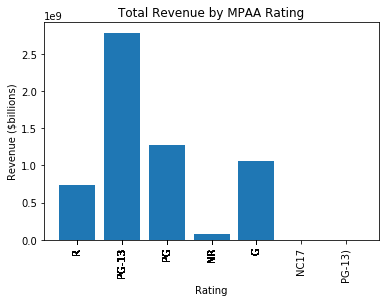

<Figure size 432x288 with 0 Axes>

In [18]:
grouped_genres = combined_movie.groupby("Genre_One").mean()
grouped_genres_sum = combined_movie.groupby("Genre_One").sum()
#combined_movie
#grouped_genres_sum
grouped_genres["Total Revenue"] = grouped_genres_sum["Revenue"]
#grouped_genres
#grouped_genres_count = combined_movie.groupby("Genre_One").count()
#grouped_genres_count
grouped_years = combined_movie.groupby('Year').mean()
#grouped_years
grouped_years_count = combined_movie.groupby("Year").count()


grouped_ratings = combined_movie.groupby('rating').mean()
#grouped_ratings["id"].count()
grouped_ratings_sum = combined_movie.groupby('rating').sum()
grouped_ratings_count = combined_movie.groupby("rating").count()

clean_ratings_group = grouped_ratings.drop(["NC17", "PG-13)"])
clean_ratings_group["Total Revenue"] = grouped_ratings_sum["Revenue"]
#clean_ratings_group

grouped_genres_clean = grouped_genres.drop(["Foreign", "TV Movie"])


# x_axis = clean_ratings_group["Genre_One"]
# y_axis = clean_ratings_group["Total Revenue"]
# plt.bar(x_axis, y_axis)
#plt.show()

#clean_ratings_group

c_movie1 = combined_movie[combined_movie["rating"] !="TV Movie"]
c_movie = c_movie1[combined_movie["Genre_One"] !="Foreign"]
c_movie.head()

x_ax = combined_movie["rating"]
y_ax = combined_movie["Revenue"]
plt.bar(x_ax, y_ax)
plt.xticks(x_ax, rotation=90)
plt.title("Total Revenue by MPAA Rating")
plt.xlabel("Rating")
plt.ylabel("Revenue ($billions)")
plt.show()

plt.savefig("Total Revenue by MPAA Rating")

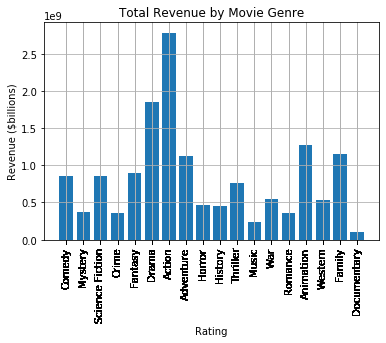

<Figure size 432x288 with 0 Axes>

In [68]:

x_axis = c_movie["Genre_One"]
y_axis = c_movie["Revenue"]
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, rotation=90)
plt.title("Total Revenue by Movie Genre")
plt.xlabel("Rating")
plt.ylabel("Revenue ($billions)")
plt.grid(True)
plt.show()
plt.savefig("Total Revenue by Movie Genre")

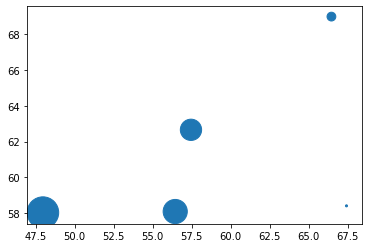

In [46]:
x = clean_ratings_group["Tomatometer Rating"]
y = clean_ratings_group["Audience Rating"]
size = clean_ratings_group["Total Revenue"]/100000000
plt.scatter(x, y, s=size)
plt.show()